## 1. Import library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from zope.interface import named

## 2. Load Data

In [5]:
data = pd.read_csv('./Groceries_dataset.csv')
data.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


### 2.1 Get information in data

In [6]:
data.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


## 3. Data Preprocessing 

### 3.1 Check null value

In [7]:
data.isnull().sum().sort_values(ascending=False)

Member_number      0
Date               0
itemDescription    0
dtype: int64

### 3.2 Covert string-time to data-time

In [11]:
data['date'] = pd.to_datetime(data["Date"], format="%d-%m-%Y")

In [12]:
data.head()

,Member_number,Date,itemDescription,date
0,1808,21-07-2015,tropical fruit,2015-07-21
1,2552,05-01-2015,whole milk,2015-01-05
2,2300,19-09-2015,pip fruit,2015-09-19
3,1187,12-12-2015,other vegetables,2015-12-12
4,3037,01-02-2015,whole milk,2015-02-01


### 3.4 Group Item by "Frequency"

In [13]:
Item_distr = data.groupby('itemDescription').size()
Item_distr = Item_distr.reset_index(name="Frequency")
Item_distr = Item_distr.sort_values(by="Frequency", ascending=False)
Item_distr

,itemDescription,Frequency
164,whole milk,2502
102,other vegetables,1898
122,rolls/buns,1716
138,soda,1514
165,yogurt,1334
...,...,...
124,rubbing alcohol,5
5,bags,4
4,baby cosmetics,3
114,preservation products,1


## 4. Plotting

### 4.1 Plot top 10 sold item

(1.0, 10.0)

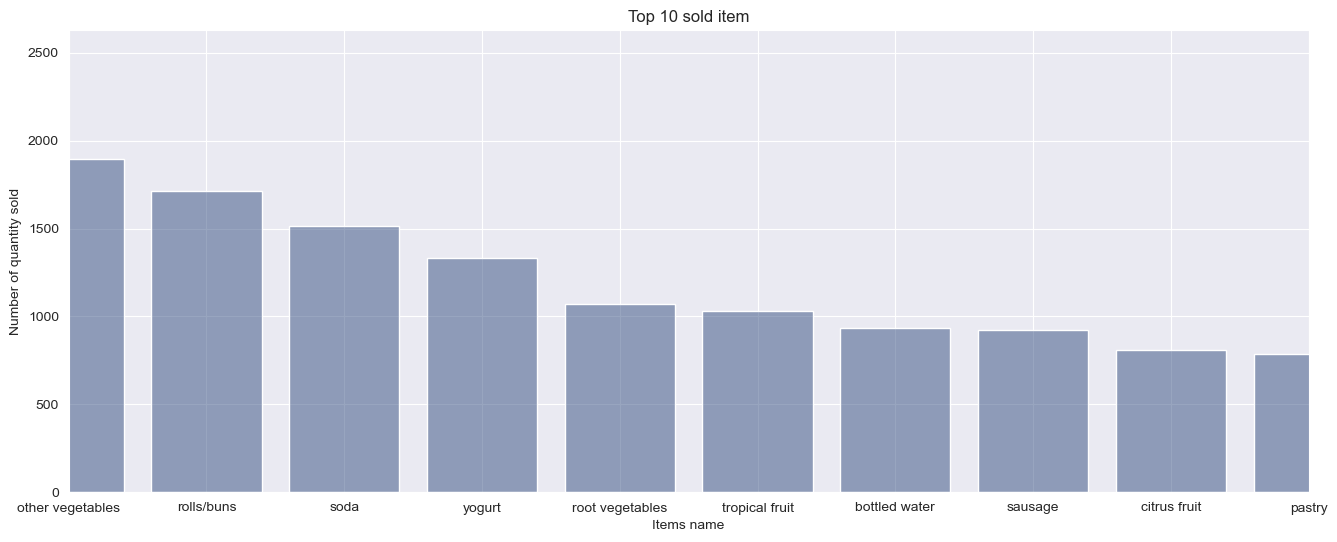

In [15]:
plt.figure(figsize=[16,6])
plt.bar(range(len(Item_distr)), Item_distr['Frequency'], color=(0.2,0.3,0.5,0.5))
plt.title('Top 10 sold item')
plt.xlabel('Items name')
plt.ylabel("Number of quantity sold")
plt.xticks(range(len(Item_distr)), Item_distr['itemDescription'])
plt.xlim(1,10)

In [16]:
data_date = data.set_index(["date"])
data_date

,Member_number,Date,itemDescription
date,,,
2015-07-21,1808,21-07-2015,tropical fruit
2015-01-05,2552,05-01-2015,whole milk
2015-09-19,2300,19-09-2015,pip fruit
2015-12-12,1187,12-12-2015,other vegetables
2015-02-01,3037,01-02-2015,whole milk
...,...,...,...
2014-10-08,4471,08-10-2014,sliced cheese
2014-02-23,2022,23-02-2014,candy
2014-04-16,1097,16-04-2014,cake bar


### 4.2 Plot Number of item sold by month

<AxesSubplot:title={'center':'Number of item sold by month'}, xlabel='date'>

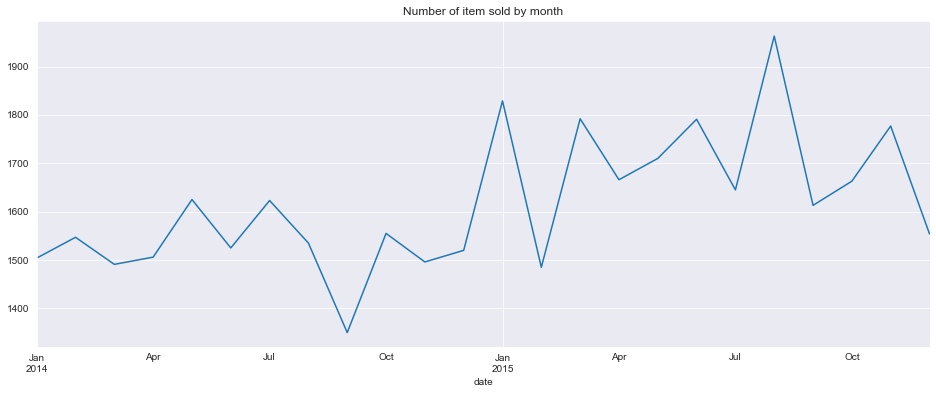

In [36]:
data_date.resample("M")['itemDescription'].count().plot(
    figsize=(16,6),
    grid=True,
    title="Number of item sold by month",
    
)

In [24]:
cust_level = data[['itemDescription', 'Member_number']].sort_values(by='Member_number', ascending=False)
cust_level['itemDescription'] = cust_level['itemDescription'].apply(lambda  x: x.strip())
cust_level

,itemDescription,Member_number
3578,soda,5000
34885,semi-finished bread,5000
11728,fruit/vegetable juice,5000
9340,bottled beer,5000
19727,root vegetables,5000
...,...,...
13331,whole milk,1000
17778,pickled vegetables,1000
6388,sausage,1000
20992,semi-finished bread,1000


In [30]:
transactions = [  a[1]["itemDescription"] for a in list(cust_level.groupby("Member_number"))] 

In [32]:
from apyori import apriori
rules = apriori(transactions=transactions, min_support=0.002, min_confidence=0.05, min_lift=3,min_length=2)

In [33]:
result = list(rules)
result

[RelationRecord(items=frozenset({'kitchen towels', 'UHT-milk'}), support=0.002308876346844536, ordered_statistics=[OrderedStatistic(items_base=frozenset({'kitchen towels'}), items_add=frozenset({'UHT-milk'}), confidence=0.30000000000000004, lift=3.821568627450981)]),
 RelationRecord(items=frozenset({'beef', 'potato products'}), support=0.002565418163160595, ordered_statistics=[OrderedStatistic(items_base=frozenset({'potato products'}), items_add=frozenset({'beef'}), confidence=0.4545454545454546, lift=3.8021849395239955)]),
 RelationRecord(items=frozenset({'coffee', 'canned fruit'}), support=0.002308876346844536, ordered_statistics=[OrderedStatistic(items_base=frozenset({'canned fruit'}), items_add=frozenset({'coffee'}), confidence=0.4285714285714286, lift=3.7289540816326534)]),
 RelationRecord(items=frozenset({'meat spreads', 'domestic eggs'}), support=0.0035915854284248334, ordered_statistics=[OrderedStatistic(items_base=frozenset({'meat spreads'}), items_add=frozenset({'domestic egg